In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../input/store.csv')
df = df.drop('Unnamed: 32', axis=1)

# Drop rows with missing values
df = df.dropna()

# Reset the index
df = df.reset_index(drop=True)

# Remove leading and trailing whitespaces from string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [3]:
df.columns

Index(['store_id', 'locnearestformat', 'locnearestany', 'locimargintarget',
       'locimarginactual', 'locomargintarget', 'locomarginactual',
       'locrevenuetarget', 'locrevenueactual', 'locgmargintarget',
       'locgmarginactual', 'locexpensetarget', 'locexpenseactual',
       'locebitdatarget', 'locebitdaactual', 'minwage', 'unemployed', 'edu14',
       'year', 'month', 'yrmo', 'population', 'Voluntary_turnover', 'Layoff',
       'Hiring', 'unitmonth_female', 'unitmonth_ftpt', 'unitmonth_hrlyrate',
       'unitmonth_white', 'tenure', 'rmgrwhite', 'rmgrfemale'],
      dtype='object')

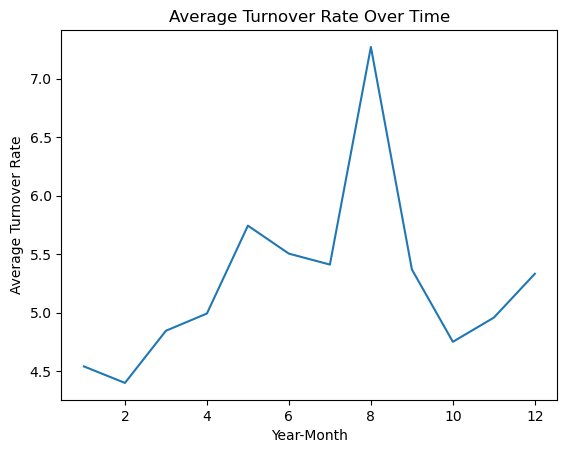

In [18]:
average_turnover_rate = df.groupby('month')['Voluntary_turnover'].mean()
average_turnover_rate
average_turnover_rate.plot()
plt.xlabel('Year-Month')
plt.ylabel('Average Turnover Rate')
plt.title('Average Turnover Rate Over Time')
plt.show()


In [9]:
num_rows = (df['store_id'] == 1).sum()
print("Number of rows with store_id = 1:", num_rows)


Number of rows with store_id = 1: 22


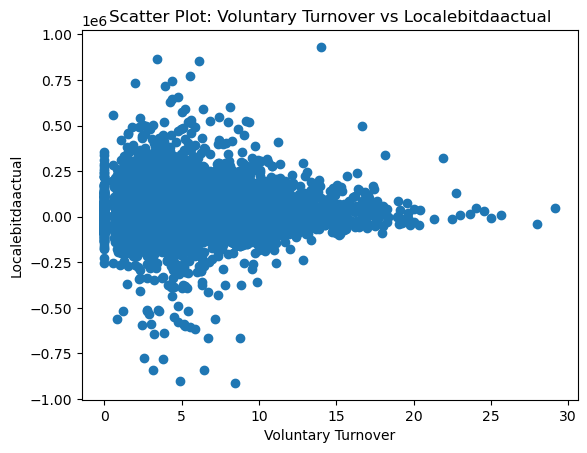

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df['Voluntary_turnover'], df['locebitdaactual'])
plt.xlabel('Voluntary Turnover')
plt.ylabel('Localebitdaactual')
plt.title('Scatter Plot: Voluntary Turnover vs Localebitdaactual')
plt.show()


In [7]:
df[['Voluntary_turnover', 'Layoff','Hiring','locebitdaactual']]

,Voluntary_turnover,Layoff,Hiring,locebitdaactual
0,3.09,0.0,0.00,58484
1,2.11,0.0,1.05,113625
2,5.10,0.0,1.02,76414
3,2.02,0.0,6.06,84669
4,4.08,0.0,1.02,54353
...,...,...,...,...
12997,3.23,0.0,2.15,29646
12998,1.14,0.0,0.00,-49498
12999,6.52,0.0,4.35,-7047
13000,6.00,0.0,12.00,-51697


In [6]:

correlation = df['Voluntary_turnover'].corr(df['locebitdaactual'])
print("Correlation between turnover rate and profit margins:", correlation)


Correlation between turnover rate and profit margins: 0.015753202707533564


In [10]:
total_expense = df.groupby('store_id')['locexpenseactual'].sum()

In [11]:
total_expense

store_id
1       6200777
2       7374286
13      9357368
24      6688906
27      5438020
         ...   
8690    2771137
8706    3101077
8732    3333167
8789    4028064
8814    4939636
Name: locexpenseactual, Length: 591, dtype: int64

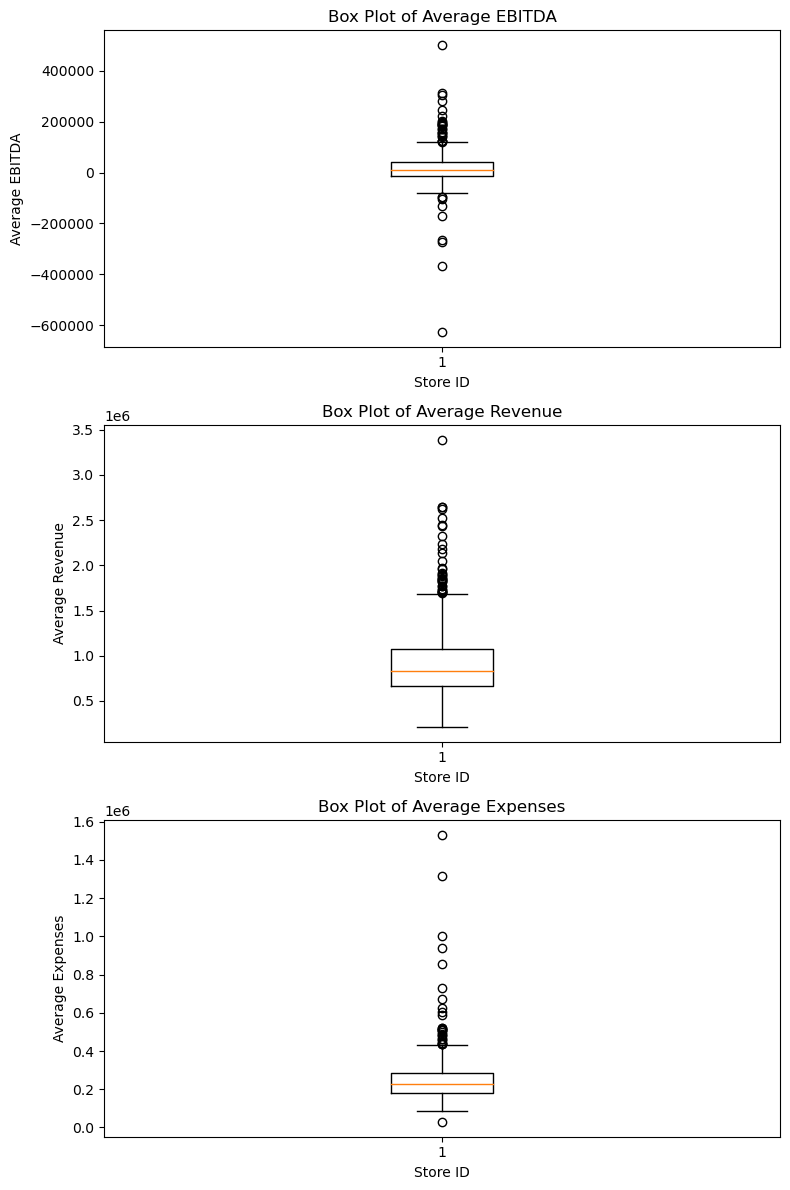

In [17]:
average_revenue = df.groupby('store_id')['locrevenueactual'].mean()
average_expenses = df.groupby('store_id')['locexpenseactual'].mean()
average_ebitda = df.groupby('store_id')['locebitdaactual'].mean()
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot 1: Average EBITDA
axes[0].boxplot(average_ebitda)
axes[0].set_xlabel('Store ID')
axes[0].set_ylabel('Average EBITDA')
axes[0].set_title('Box Plot of Average EBITDA')

# Plot 2: Average Revenue
axes[1].boxplot(average_revenue)
axes[1].set_xlabel('Store ID')
axes[1].set_ylabel('Average Revenue')
axes[1].set_title('Box Plot of Average Revenue')

# Plot 3: Average Expenses
axes[2].boxplot(average_expenses)
axes[2].set_xlabel('Store ID')
axes[2].set_ylabel('Average Expenses')
axes[2].set_title('Box Plot of Average Expenses')

plt.tight_layout()
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a dataframe named 'df' with features and target variable
X = df.drop('locrevenueactual', axis=1)
y = df['locrevenueactual']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the revenue targets for the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 5183172504.085613
